In [18]:
# !pip install seaborn

In [19]:
"Importing the necessary libraries required for the project."

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
"Setting the display of columns and rows to maximum of 100 and 500 respectively to better view the data table."

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [21]:
"Reading the data and saving it as a dataframe."

training_data = pd.read_csv('train.csv')
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
training_data.shape

(1460, 81)

In [23]:
"Dropping columns which have more than 15% of null values."

training_data.drop(training_data.isnull().sum()[training_data.isnull().sum()/len(training_data) > 0.15].index, axis = 1, inplace = True)

In [24]:
training_data.shape

(1460, 74)

In [25]:
# !pip install scipy

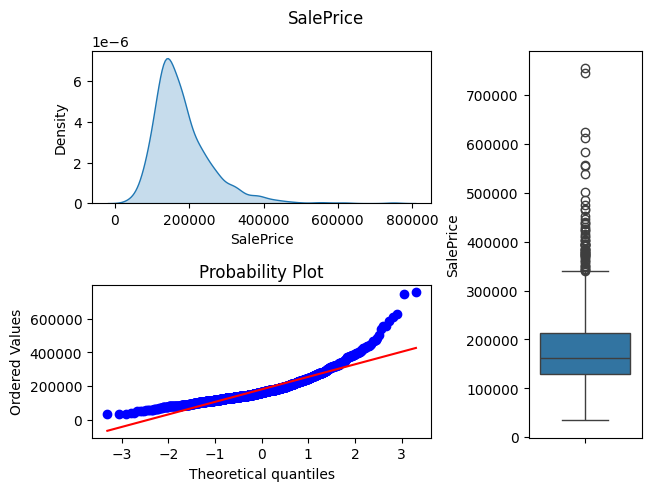

In [26]:
"Creating Kernel density plot, QQ plot to check if the target column data is Guassian distribution or not and bar plot to check for outliers."

from matplotlib.gridspec import GridSpec
import  scipy.stats as stats

fig = plt.figure(layout="constrained")

gs = GridSpec(2, 4, figure=fig)
ax1 = fig.add_subplot(gs[0:-1, :-1])
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[:, -1])

fig.suptitle('SalePrice')
sns.kdeplot(training_data['SalePrice'], fill = True, ax = ax1)
stats.probplot(training_data['SalePrice'], dist='norm', plot=ax2)
sns.boxplot(training_data['SalePrice'], ax=ax3)

plt.show()

## Target is not gaussian distribution and has outliers

1. We need to see the co-relation btw the target and the features
2. We have both num and categorical values in features
3. Feature engineering - Segregate the num and cat values
4. There has to be some co-relation between target and features for regression
6. There should not be any co-relation within features to avoid multi-collinearity issue

In [27]:
"Segregating the numerical value columns and categorical value columns for better analysis."

numerical = training_data.select_dtypes(exclude='object')
categorical = training_data.select_dtypes(include='object')
print(numerical.shape)
print(categorical.shape)

(1460, 37)
(1460, 37)


In [28]:
try:
    assert len(training_data.columns) == len(numerical.columns) + len(categorical.columns)
    print('successfully segregated the numerical cols from categorical cols')
except AssertionError:
    print('Columns are not matching')

successfully segregated the numerical cols from categorical cols


In [29]:
"Initializing the Target column"

y = numerical['SalePrice']
numerical.drop('SalePrice', axis=1, inplace=True)

In [30]:
numerical.head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007


In [31]:
categorical.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [32]:
"""
    The data contains ordinal or nominal values that are represented by numbers as labels. 
    So segregating this kind of data from actual numerical data is necessary. 
    Only then can we further proceed to select the feature matrix.
    
    Each column is checked to see how many unique numerical values they contain, 
    and if they have less than 50 unique values they are considered to be numerical_categorical value columns
    and if they have more than 50 unique numerical values then they are considered numerical value columns.
"""

num_cat = numerical[numerical.nunique()[numerical.nunique() < 50].index]    
num_num = numerical[numerical.nunique()[numerical.nunique() >= 50].index]   
print(num_cat.columns)

num_num.drop('Id', axis=1, inplace=True)
print(num_num.columns)

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object')


C:\Users\Admin\AppData\Local\Temp\ipykernel_15420\1342585283.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_num.drop('Id', axis=1, inplace=True)


In [33]:
"Dropping columns that contain year specific values."

year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
num_num_years = num_num[year_cols]
num_num_wo_years = num_num.drop(year_cols, axis=1)

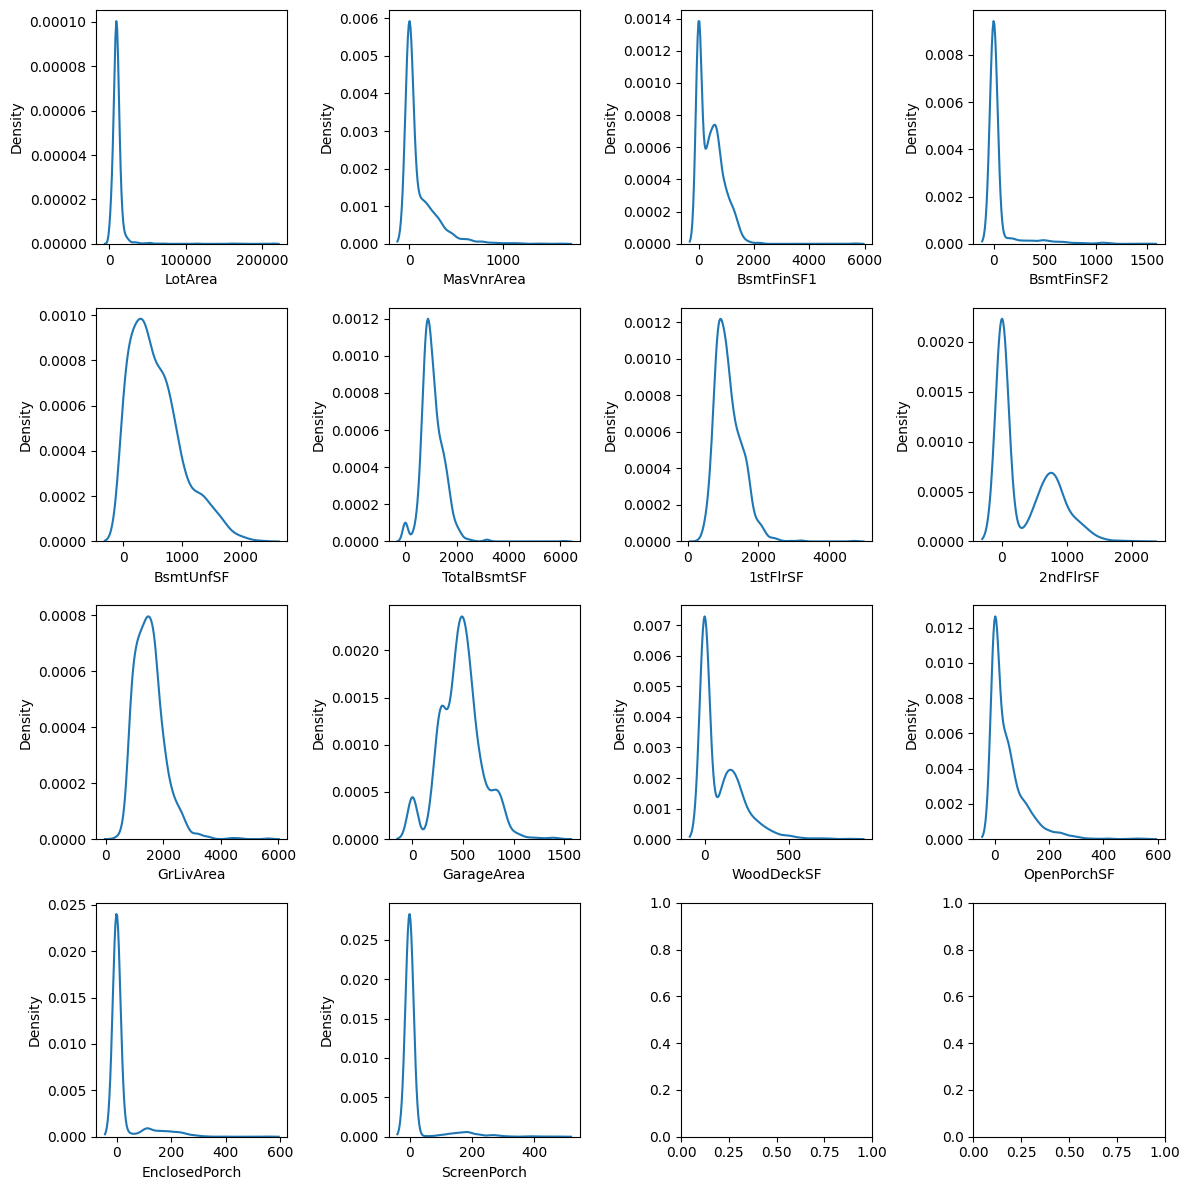

In [34]:
"Observing the kernel density for each column to see if they are Guassian distribution."

fig, axes = plt.subplots( 4, 4, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    sns.kdeplot(num_num_wo_years[cols], ax = ax)
plt.tight_layout();

<Axes: >

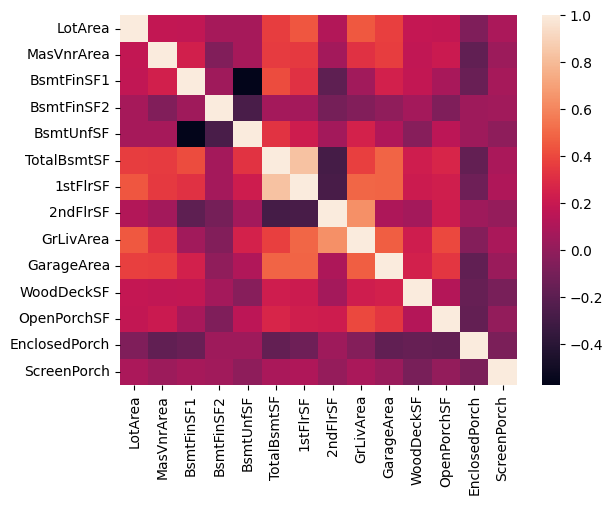

In [35]:
'''
    Before selecting the feature matrix, we need to see if two or more columns have similar correlation with each other,
    as if they did have, we did be duplicating the result. So if two or more columns have strong correlation we can keep one and drop
    the other to reduce redundancy.

    To observe the correlation of all columns with each other, we use the heatmap with Spearman Correlation,
    as the data is not Guassian Distribution and contians lots of outliers.

    The heatmap will display a grid where each cell represents the Spearman correlation coefficient between two variables.
    Darker colors or more saturated hues typically represent stronger correlations (either positive or negative).
    Lighter colors or less saturated hues represent weaker correlations.
'''

sns.heatmap(num_num_wo_years.corr(method = 'spearman'))

In [36]:
'''
    "BsmtFinSF1" and "BsmtUnfSF" have negative correlation while "1stFlrSF" and "TotalBsmtSF" have a positive correlation.
    So we drop "BsmtFinSF1" and "1stFlrSF" columns so we dont have redundancy in the results.
'''

num_num_drop_corr = ['BsmtFinSF1', '1stFlrSF']
num_num_wo_years.drop(num_num_drop_corr, axis = 1, inplace = True)

In [37]:
num_num_wo_years.shape

(1460, 12)

In [38]:
# check how many 0s are present in a column and dropping columns with more than 50% of values that are 0s.

val = num_num_wo_years.replace(0, np.nan).isnull().sum()
rows_len = num_num_wo_years.shape[0]
drop_cols = val[(val/rows_len) > 0.5].index
num_num_wo_years.drop(drop_cols, axis = 1, inplace = True)

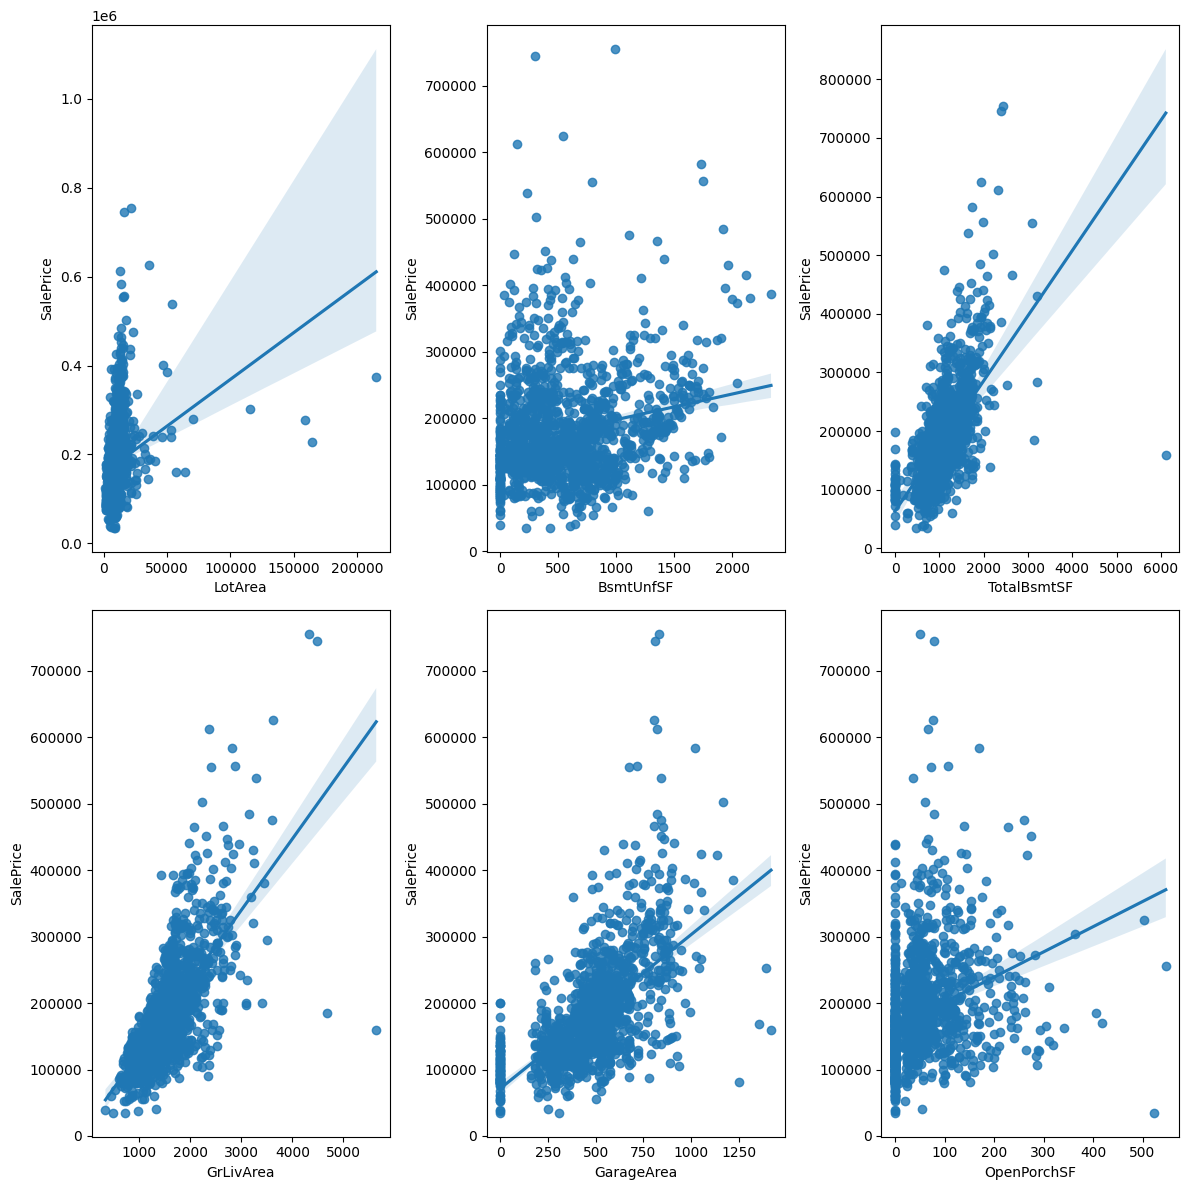

In [39]:
'Simple Regression plot for each column of the feature matrix with the target column to see how the line fits the pattern.'

fig, axes = plt.subplots( 2, 3, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    sns.regplot(x = num_num_wo_years[cols] , y = y,  ax = ax)
plt.tight_layout()

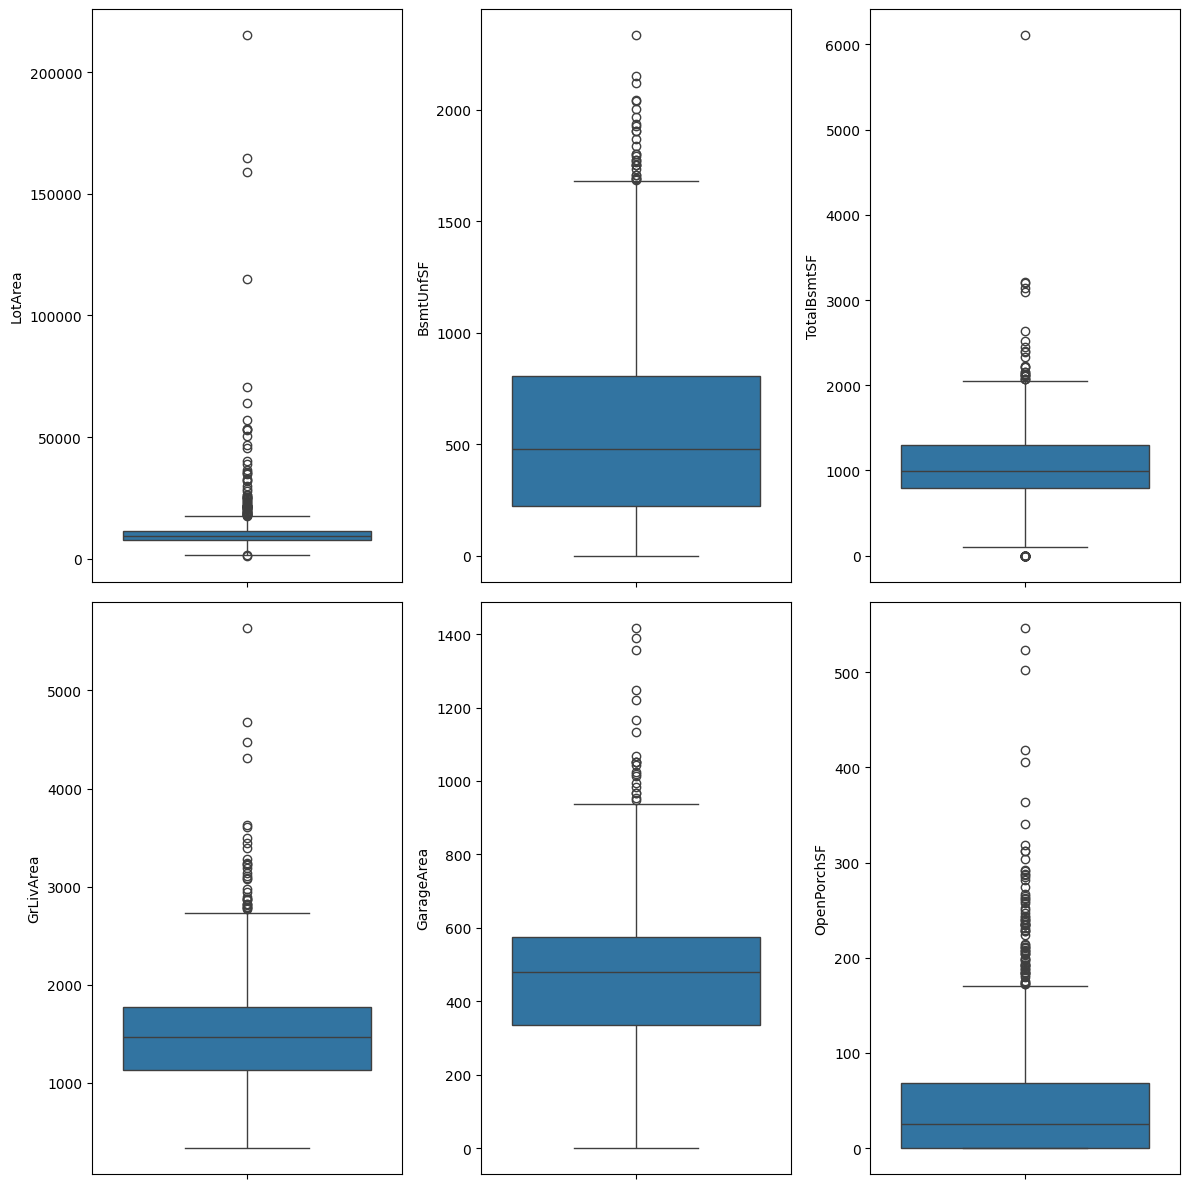

In [40]:
'Boxplot of each column in the feature matrix to see how many outliers each column have.'

fig, axes = plt.subplots(2, 3, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    sns.boxplot(y = num_num_wo_years[cols], ax = ax)
plt.tight_layout()

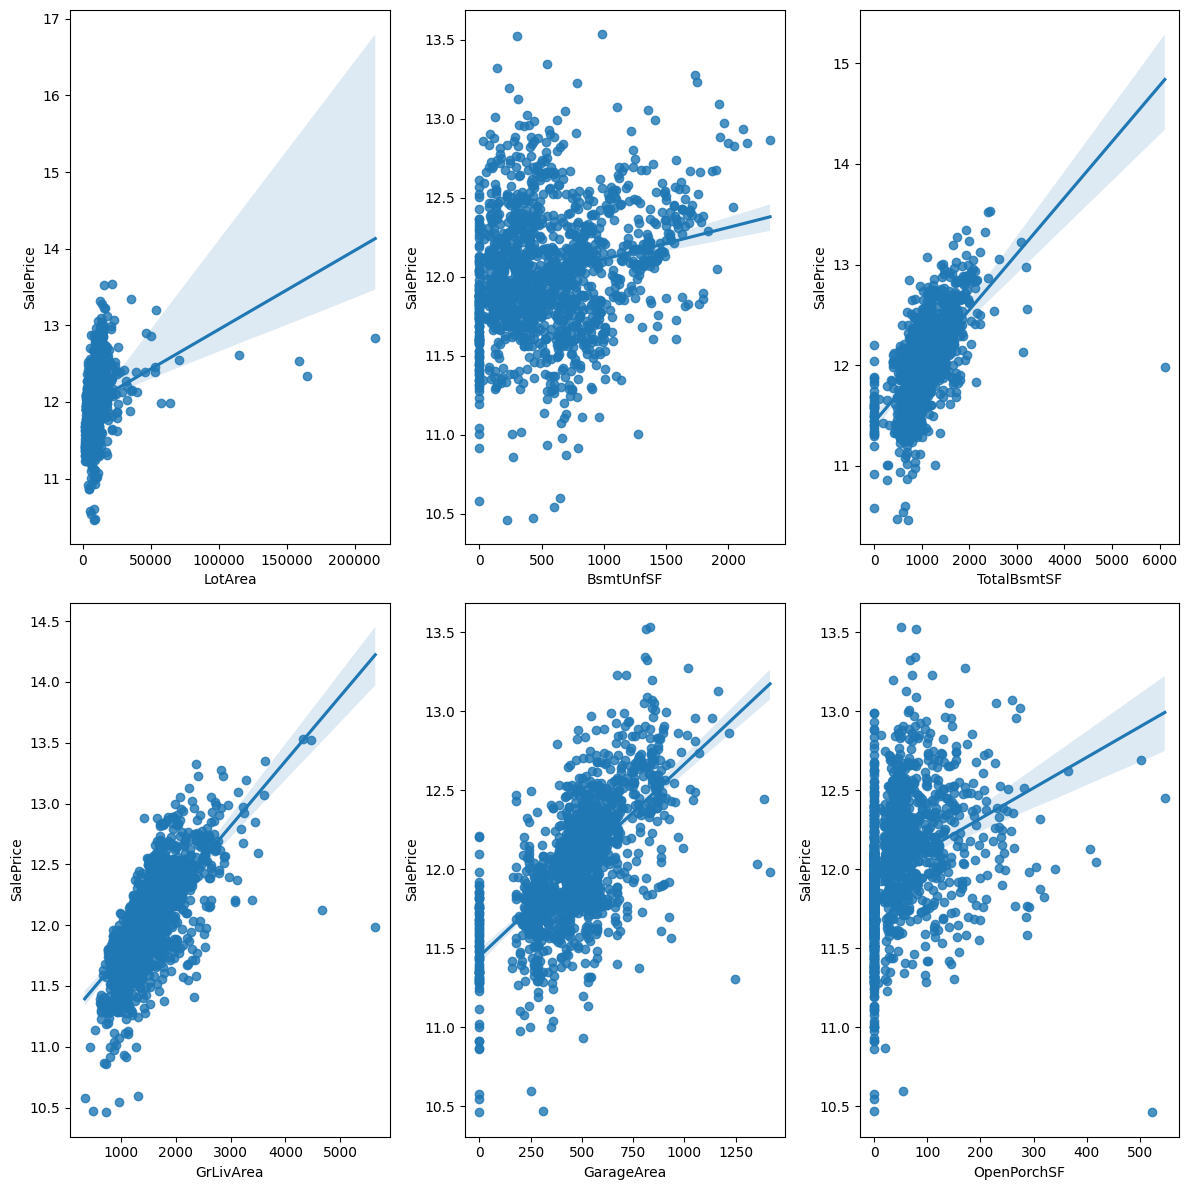

In [41]:
fig, axes = plt.subplots(2, 3, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    sns.regplot(x = num_num_wo_years[cols] , y = np.log1p(y),  ax = ax)
plt.tight_layout()

> The above plot between log value of target and numerical features confirms converting the values from non gaussian to gaussian does not alter the correlation between the target and features.

In [42]:
import pandas as pd

def replace_outliers(data: pd.DataFrame, percentile: float = 0.95) -> pd.DataFrame:
    '''
    This function replaces outliers in a DataFrame.
    Any value above the given percentile is replaced with the value at that percentile.
    
    Parameters:
    data (pd.DataFrame): The DataFrame in which to replace outliers.
    percentile (float): The percentile threshold to identify outliers (default is 0.95).
    
    Returns:
    pd.DataFrame: The DataFrame with outliers replaced.
    '''
    
    # Copy the DataFrame to avoid modifying the original one
    df_copy = data.copy()
    
    # Apply the quantile replacement
    for column in df_copy.columns:
        threshold = df_copy[column].quantile(percentile)
        df_copy[column] = df_copy[column].apply(lambda x: min(x, threshold))
    
    return df_copy


temp = replace_outliers(num_num_wo_years, 0.98)

In [43]:
try:
    assert num_num_wo_years.shape[0] == len(y)
    print(f'The len of concat data is: {num_num_wo_years.shape[0]}')
    tem = pd.concat([temp, y], axis = 1)
except AssertionError:
    print('The rows for feature dataframe and target series are not matching')

The len of concat data is: 1460


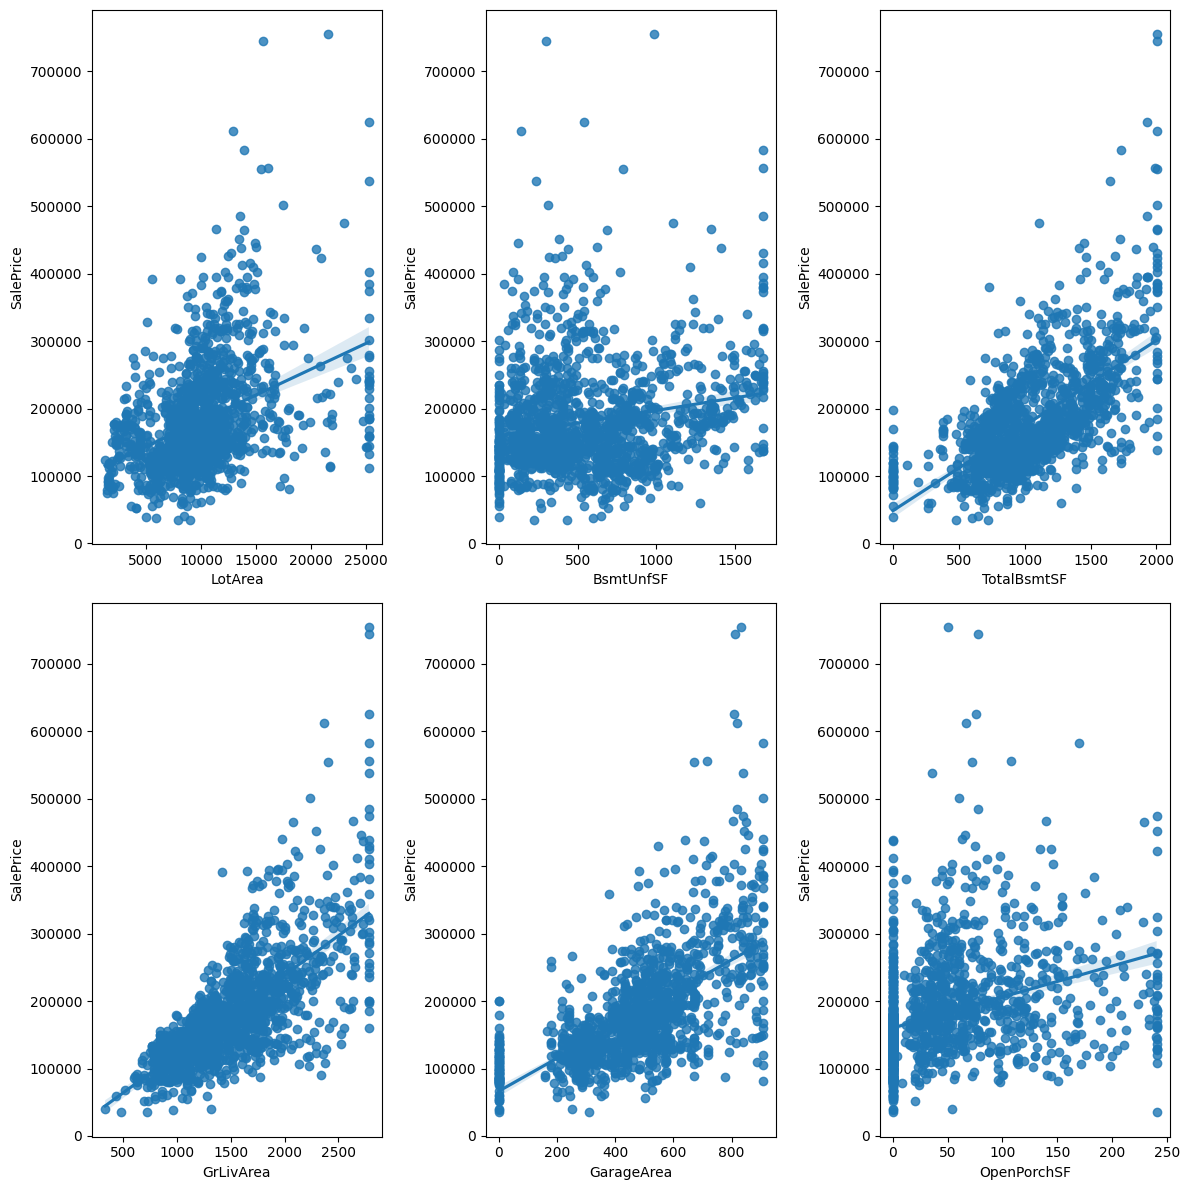

In [44]:
'''
    After the outliers that are more than the 98th percentile are replaced with the 98th percentile value.
    The simple regression plot for the refined data looks more evenly distributed and fits the line better.
'''
fig, axes = plt.subplots(2, 3, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    temp = tem[[cols, 'SalePrice']]
    sns.regplot(x = temp[cols] , y = temp['SalePrice'],  ax = ax)
plt.tight_layout()

In [45]:
tem.head()

,LotArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,OpenPorchSF,SalePrice
0,8450.0,150.0,856.0,1710.0,548.0,61.0,208500
1,9600.0,284.0,1262.0,1262.0,460.0,0.0,181500
2,11250.0,434.0,920.0,1786.0,608.0,42.0,223500
3,9550.0,540.0,756.0,1717.0,642.0,35.0,140000
4,14260.0,490.0,1145.0,2198.0,836.0,84.0,250000


In [46]:
tem.drop('SalePrice', axis=1, inplace = True)
tem.head()

,LotArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,OpenPorchSF
0,8450.0,150.0,856.0,1710.0,548.0,61.0
1,9600.0,284.0,1262.0,1262.0,460.0,0.0
2,11250.0,434.0,920.0,1786.0,608.0,42.0
3,9550.0,540.0,756.0,1717.0,642.0,35.0
4,14260.0,490.0,1145.0,2198.0,836.0,84.0


In [47]:
X = tem

In [50]:
# !pip install scikit-learn

In [51]:
'''
    When creating a ML model, the dataset must be distributed in a 80:20 ratio for training and testing. 
    The segregation of the data must be done at random to obtain all rounded results from the model.
    This is done using the train_test_split function which at default splits the data into 80% for training purpose and 20% for testing.

    As the target data is not Guassian Distribution, regression model cannot be applied.
    So here we use np.log1p(y), scaling the target data by log scale to make the distribution Guassian.
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, np.log1p(y))
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1460, 6) (1460,)
(1095, 6) (1095,)
(365, 6) (365,)


In [52]:
"Creating a Linear Regression model with feature matrix with less outliers."

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
print(model.coef_)
print(model.intercept_)

[ 1.40350928e-06 -9.98876244e-05  3.51408945e-04  3.61433178e-04
  5.79967135e-04  4.03535453e-04]
10.862411369229521


In [54]:
"Predicting the Target using the feature matrix from the test data."
y_pred = model.predict(X_test)

In [55]:
'''
    R2 score is used to validate the model.The R² score, also known as the coefficient of determination, 
    is a metric used to evaluate the performance of a regression model. It tells us how well the model's predictions match the actual data.
    The score ranges from 0 to 1, with 1 indicating a perfect model.
'''
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
print(score)

0.7097043721139806


In [56]:
num_num_wo_years.head()
num_num_wo_years.fillna(0, inplace = True)

In [57]:
"Here we use the feature matrix with no outliers removed, just to check how it affects the model's prediction."

X_train = num_num_wo_years
y_train = np.log1p(y)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
print(model.coef_)
print(model.intercept_)

[ 5.28101615e-07 -5.21416179e-05  2.50927071e-04  3.21980267e-04
  5.90201717e-04  2.59782533e-04]
11.003517978616953


In [59]:
y_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
print(score)

0.5937225820793247


# The above R2 score confirms that with outliers the model's prediction is less accurate.